# Projeto de Disciplina de Algoritmos de Inteligência Artificial para Clusterização

### Aluno: Alexandre José Messias de Lara

Github do projeto: https://github.com/thealexandrelara/project-infnet-algoritmos-de-inteligencia-artificial-para-clusterizacao-25E4_2

# Parte 1 - Infraestrutura

### 1. Você está rodando em Python 3.9+

A versão 3.12.8 está sendo utilizada neste projeto. Pode ser constatado pela imagem, pelo arquivo `python-version` ou pelo `pyproject.toml` localizado na raíz do projeto.

### 2. Você está usando um ambiente virtual: Virtualenv ou Anaconda

O ambiente virtual do virtualenv está sendo utilizado em conjunto com o `uv` como gerenciador de dependências.

### 3. Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico

O ambiente virtual `project-infnet-algoritmos-de-inteligencia-artificial-para-clusterizacao-25e4-2` está sendo utilizado com o Python 3.12.8 instalado. Todas as bibliotecas estão instaladas neste ambiente.

### 4. Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.

O arquivo `requirements.txt` gerado se encontra na raíz deste projeto.

### 5. Tire um printscreen do ambiente que será usado rodando em sua máquina.

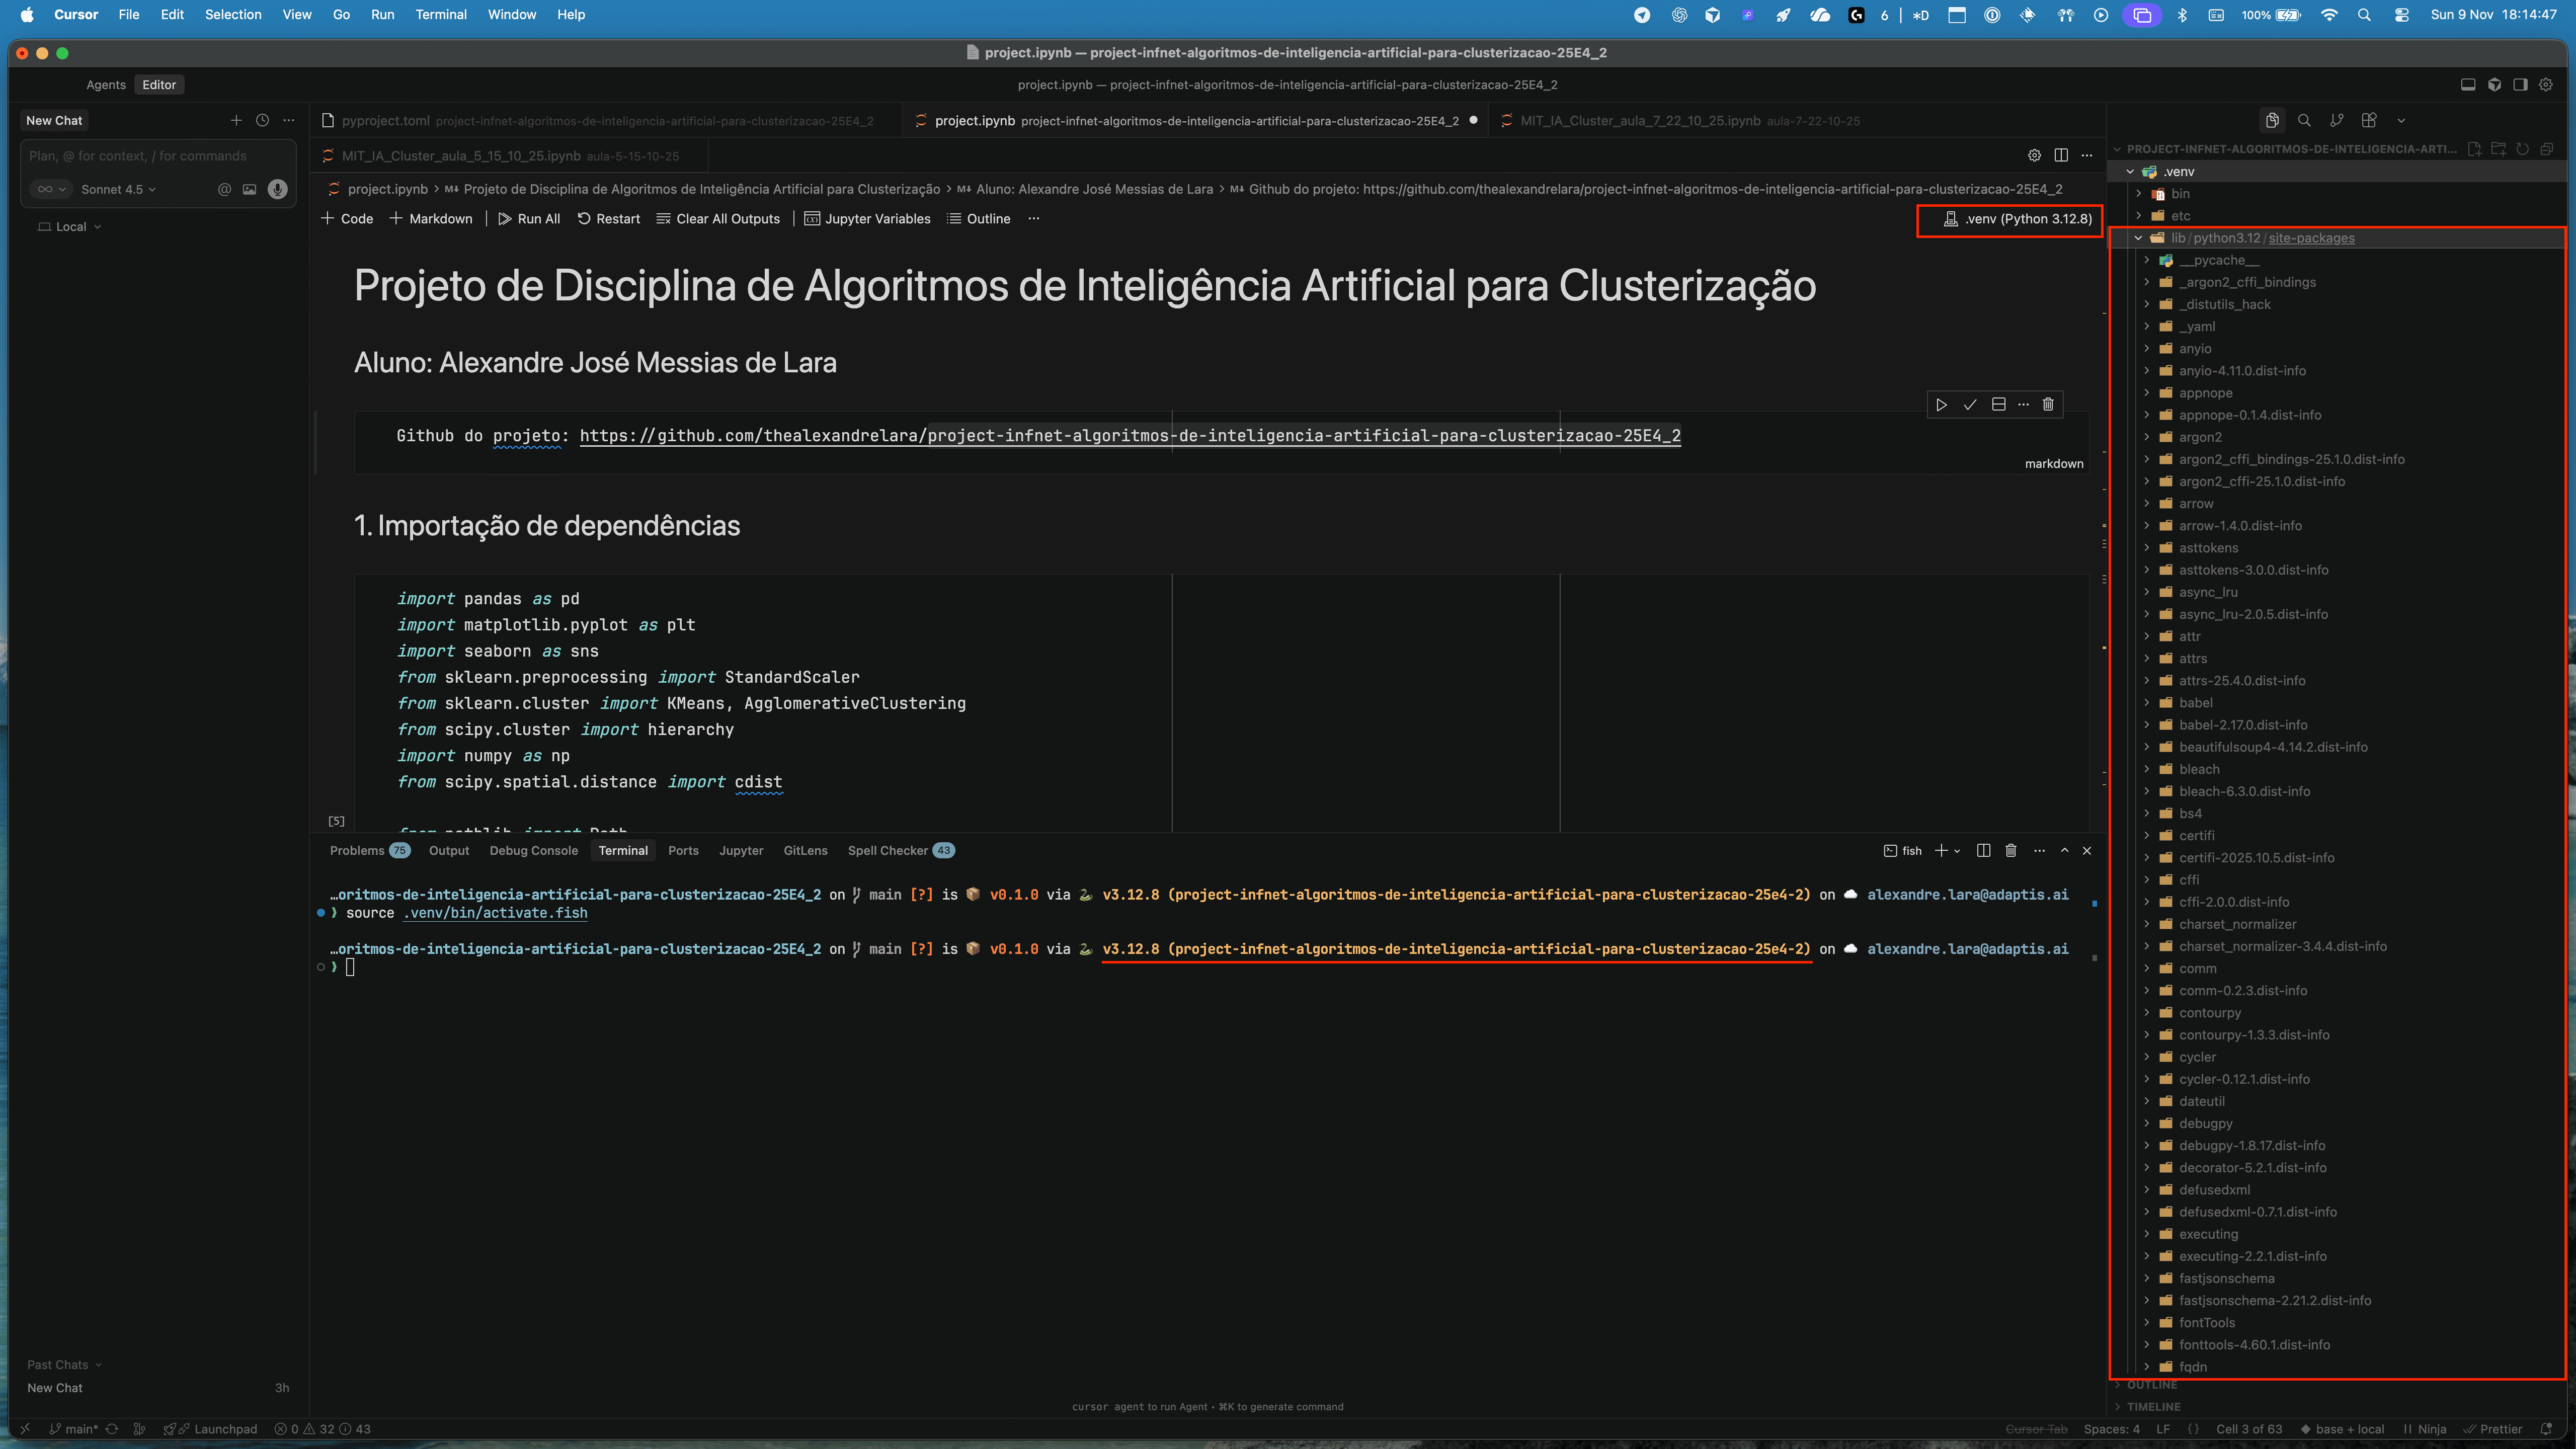

In [5]:
from PIL import Image
Image.open('assets/python-environment-local.png')



### 6. Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).

Github do projeto: https://github.com/thealexandrelara/project-infnet-algoritmos-de-inteligencia-artificial-para-clusterizacao-25E4_2

## Parte 2 - Escolha de base de dados

Importação de dependências

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster import hierarchy
import numpy as np
from scipy.spatial.distance import cdist

from pathlib import Path

Visualização do dicionário de dados

In [7]:
data_dict_path = Path.cwd() / "data" / "data-dictionary.csv"
data_dict = pd.read_csv(data_dict_path)

pd.set_option("display.max_colwidth", None)

data_dict


,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


#### 2.1. Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

In [8]:
data_path = Path.cwd() / "data" / "Country-data.csv"
df = pd.read_csv(data_path)

df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Estatísticas do dataset

In [9]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Resumo do dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### 2.2. Quantos países existem no dataset?

In [11]:
print(f"Existem {df['country'].nunique()} países no dataset.")

Existem 167 países no dataset.


#### 2.3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

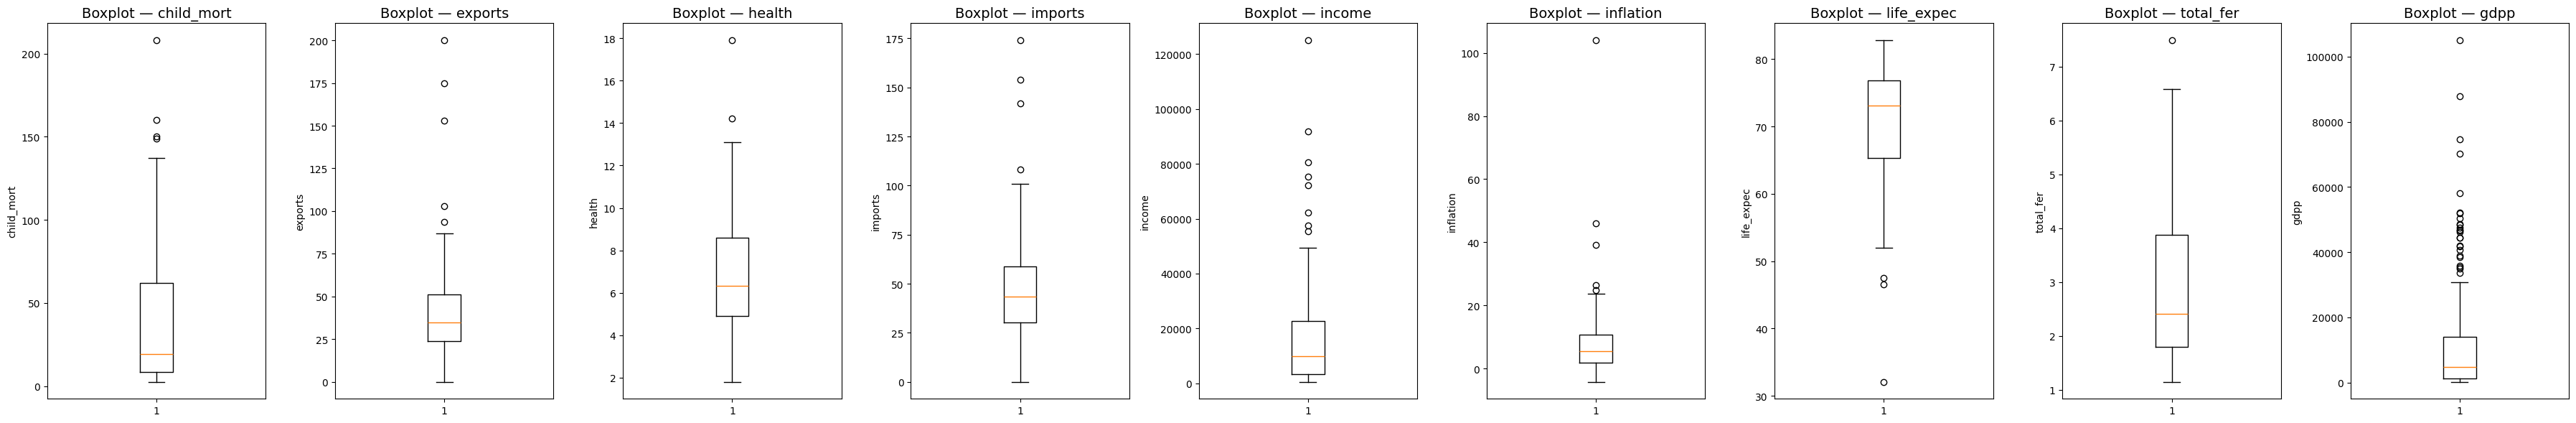

In [12]:
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include='number').columns
n_cols = len(num_cols)

fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 4, 6))

for ax, col in zip(axes, num_cols):
    ax.boxplot(df[col].dropna())
    ax.set_title(f"Boxplot — {col}", fontsize=14)
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

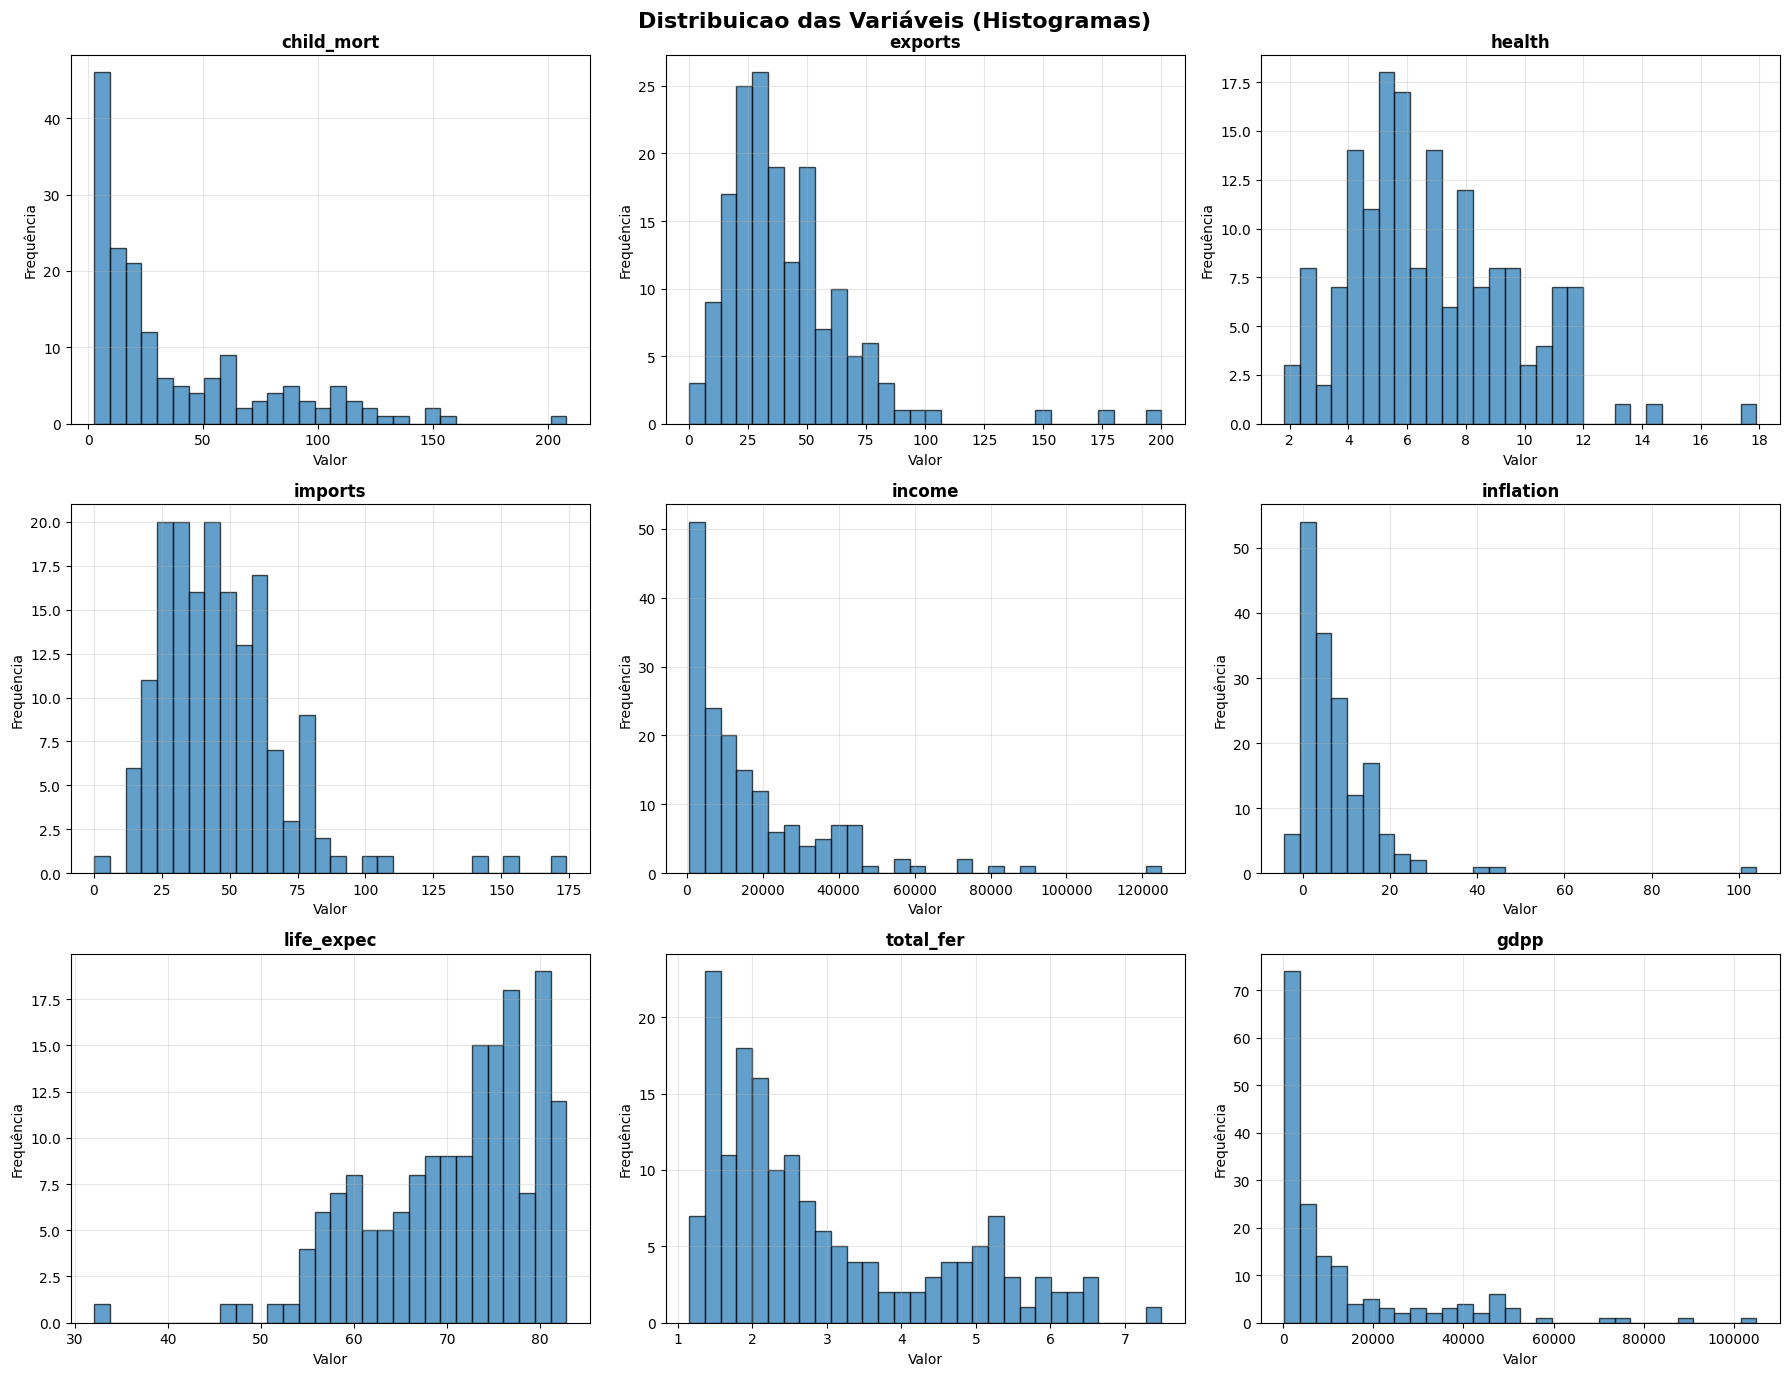

In [13]:
fig2, axes = plt.subplots(3, 3, figsize=(18, 14))
fig2.suptitle('Distribuicao das Variáveis (Histogramas)', fontsize=16, fontweight='bold')

for idx, col in enumerate(num_cols):
    ax = axes[idx // 3, idx % 3]
    ax.hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    ax.set_title(f'{col}', fontweight='bold')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frequência')
    ax.grid(True, alpha=0.3)

plt.tight_layout()

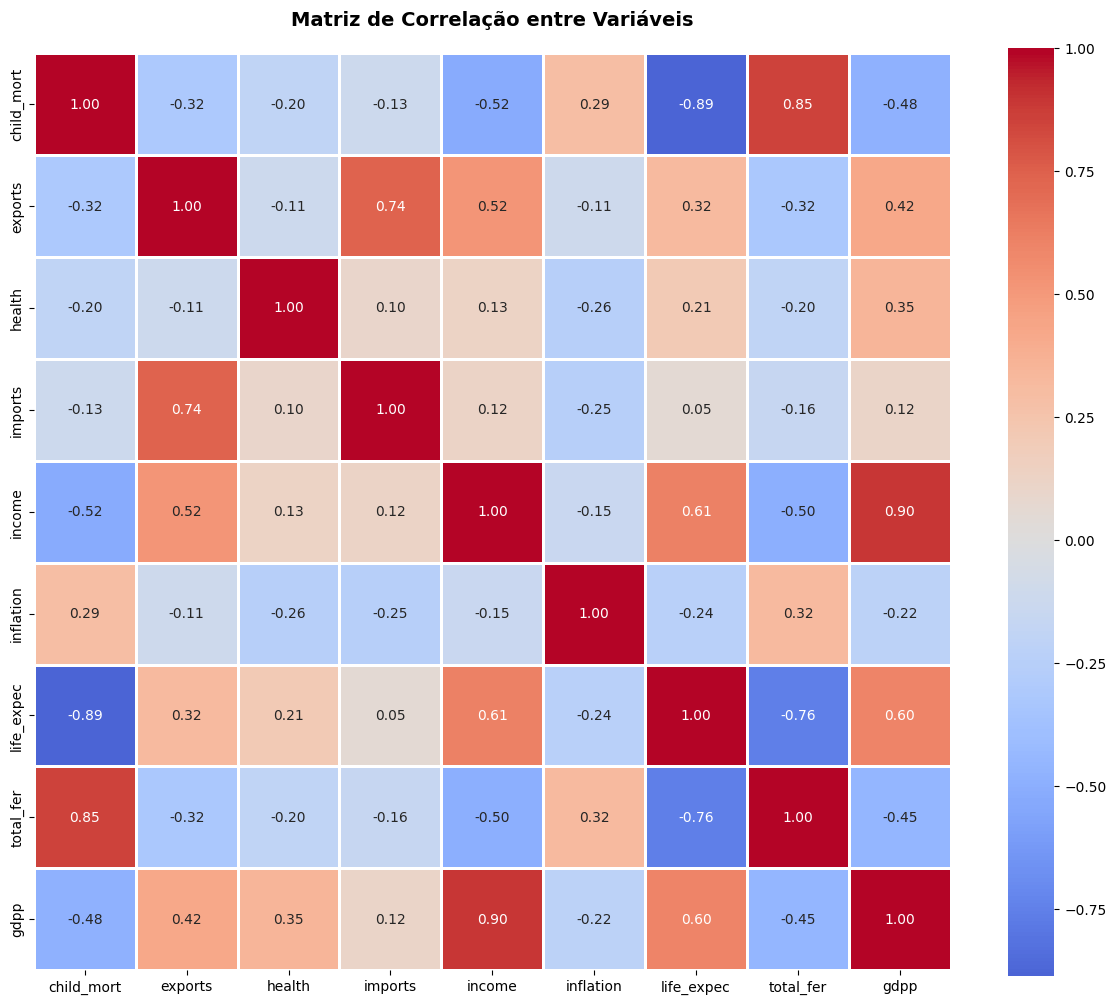

In [14]:
fig3, ax = plt.subplots(figsize=(12, 10))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, ax=ax)
ax.set_title('Matriz de Correlação entre Variáveis', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()

Após análise gráfica via boxplots e histogramas, observa-se que as variáveis apresentam faixas dinâmicas muito distintas e forte presença de outliers. Como técnicas de clusterização baseadas em distância (como K-Means) são sensíveis à escala das variáveis, é necessário padronizar os dados antes do processo de clusterização. Portanto, o pré-processamento incluirá remoção da coluna country, normalização/padronização das variáveis, o tratamento dos outliers pode ser necessário ou a escolha por um método mais robusto a outliers como o DBScan. Além disso, pode-se certificar se existem valores ausentes para poder fazer o tratamento dos dados faltantes.

### 2.4. Realize o pré-processamento adequado dos dados.

##### Verificação de valores ausentes

In [ ]:
df_processed = df.copy()

missing_values = df_processed.isnull().sum()

if missing_values.sum() > 0:
    print("Existem valores ausentes no dataset.")
    print(f"Total de valores ausentes: {missing_values.sum()}")
    print("\nVariáveis com valores ausentes:")
    print(missing_values[missing_values > 0])
else:
    print("Não existem valores ausentes no dataset.")

Não existem valores ausentes no dataset.


##### Separação de features e países

In [16]:
X = df_processed[num_cols].values
y = df_processed['country'].values

Escalonamento

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=num_cols)
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## Parte 3 - Clusterização

### 3.1.a. Realizar o agrupamento dos países em 3 grupos distintos - K-médias

In [18]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [19]:
kmeans.cluster_centers_

array([[-0.39328196, -0.03058375, -0.20617903,  0.01956247, -0.25093021,
        -0.00578315,  0.22676244, -0.40257862, -0.35583225],
       [-0.82744866,  0.64507985,  0.72741122,  0.19063895,  1.48424268,
        -0.48492064,  1.07957853, -0.79187687,  1.61599536],
       [ 1.41356446, -0.45761494, -0.18789794, -0.18989721, -0.70783863,
         0.39898875, -1.29703104,  1.40287396, -0.61276131]])

In [20]:
print(f"\nClusters formados:")
for i in range(3):
    count = np.sum(kmeans_labels == i)
    print(f"  Cluster {i}: {count} paises ({count/len(df)*100:.1f}%)")


Clusters formados:
  Cluster 0: 86 paises (51.5%)
  Cluster 1: 36 paises (21.6%)
  Cluster 2: 45 paises (26.9%)


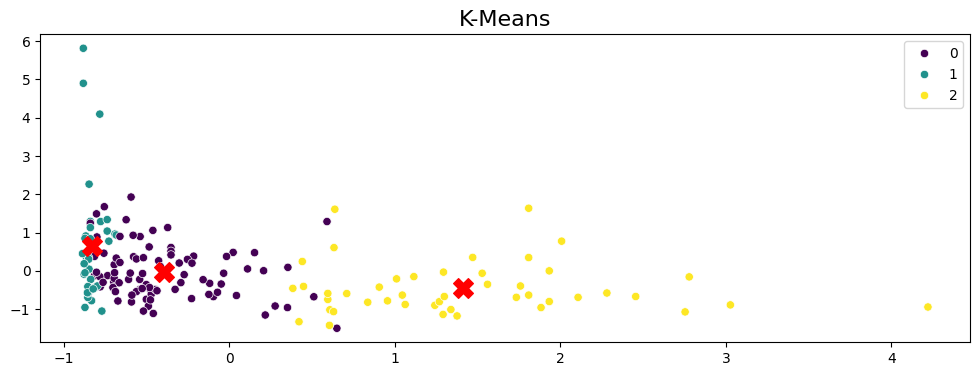

In [21]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

sns.scatterplot(
    x=X_scaled[:, 0], 
    y=X_scaled[:, 1], 
    hue=kmeans_labels, 
    palette='viridis', 
    ax=ax
)

ax.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker='X',
    s=200,
    color='red'
)

ax.set_title('K-Means', fontsize=16)
plt.show()

### 3.1.b Realizar o agrupamento dos países em 3 grupos distintos - Clusterização Hierárquica

Single Linkage

In [22]:
hierarchical_single_linkage = AgglomerativeClustering(n_clusters=3, linkage='single', metric='euclidean')
hierarchical_single_linkage_labels = hierarchical_single_linkage.fit_predict(X_scaled)

print(f"\nClusters formados:")
for i in range(3):
    count = np.sum(hierarchical_single_linkage_labels == i)
    print(f"  Cluster {i}: {count} paises ({count/len(df)*100:.1f}%)")


Clusters formados:
  Cluster 0: 165 paises (98.8%)
  Cluster 1: 1 paises (0.6%)
  Cluster 2: 1 paises (0.6%)


Complete linkage

In [39]:
hierarchical_complete_linkage = AgglomerativeClustering(n_clusters=3, linkage='complete', metric='euclidean')
hierarchical_complete_linkage_labels = hierarchical_complete_linkage.fit_predict(X_scaled)

print(f"\nClusters formados:")
for i in range(3):
    count = np.sum(hierarchical_complete_linkage_labels == i)
    print(f"  Cluster {i}: {count} paises ({count/len(df)*100:.1f}%)")


Clusters formados:
  Cluster 0: 55 paises (32.9%)
  Cluster 1: 109 paises (65.3%)
  Cluster 2: 3 paises (1.8%)


In [48]:
hierarchical_average_linkage = AgglomerativeClustering(n_clusters=3, linkage='average', metric='euclidean')
hierarchical_average_linkage_labels = hierarchical_average_linkage.fit_predict(X_scaled)

print(f"\nClusters formados:")
for i in range(3):
    count = np.sum(hierarchical_average_linkage_labels == i)
    print(f"  Cluster {i}: {count} paises ({count/len(df)*100:.1f}%)")


Clusters formados:
  Cluster 0: 163 paises (97.6%)
  Cluster 1: 1 paises (0.6%)
  Cluster 2: 3 paises (1.8%)


In [ ]:
hierarchical_ward_linkage = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
hierarchical_ward_linkage_labels = hierarchical_ward_linkage.fit_predict(X_scaled)

print(f"\nClusters formados:")
for i in range(3):
    count = np.sum(hierarchical_ward_linkage_labels == i)
    print(f"  Cluster {i}: {count} paises ({count/len(df)*100:.1f}%)")

### 3.2.a. Para os resultados do K-Médias. Interprete cada um dos clusters obtidos citando: 

i. Qual a distribuição das dimensões em cada grupo. 

ii. O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique

Interpretação dos clusters K-Means

In [23]:
def cluster_countries(cluster_data):
    print(f"\nNumero de paises: {len(cluster_data)}")
    print(f"\nPaises neste cluster:")
    countries_list = cluster_data['country'].tolist()
    for i in range(0, len(countries_list), 15):
        print("  " + ", ".join(countries_list[i:i+15]))

def dimension_distribution(cluster_data):
    stats_df = cluster_data[num_cols].describe().loc[['mean', '50%', 'std']]
    print(stats_df.to_string())

def main_characteristics(cluster_data, cluster_title):
    print(f"\nCARACTERISTICAS PRINCIPAIS {cluster_title}:")
    means = cluster_data[num_cols].mean()
    
    print(f"  - Mortalidade Infantil: {means['child_mort']:.1f} (por 1000)")
    print(f"  - Expectativa de Vida: {means['life_expec']:.1f} anos")
    print(f"  - Renda per capita: ${means['income']:.0f}")
    print(f"  - GDPP: ${means['gdpp']:.0f}")
    print(f"  - Gastos com Saude: {means['health']:.1f}% do PIB")
    print(f"  - Inflacao: {means['inflation']:.1f}%")
    print(f"  - Taxa de Fertilidade: {means['total_fer']:.2f}")

def representative_country(cluster_data, cluster_id):
    print(f"\nPAIS REPRESENTANTE DO CLUSTER {cluster_id}:")
    print("-" * 80)
    cluster_mask = kmeans_labels == cluster_id
    
    cluster_scaled_data = X_scaled[cluster_mask]
    centroid = kmeans.cluster_centers_[cluster_id]
    distances = cdist(cluster_scaled_data, [centroid], metric='euclidean').flatten()
    
    closest_idx = np.argmin(distances)
    representative_country = cluster_data.iloc[closest_idx]['country']
    
    print(f"\nPais Representante: {representative_country}")
    print(f"Distancia ao centroide: {distances[closest_idx]:.4f}")

In [40]:
cluster_zero_mask = kmeans_labels == 0
cluster_zero_data = df[cluster_zero_mask]

cluster_one_mask = kmeans_labels == 1
cluster_one_data = df[cluster_one_mask]

cluster_two_mask = kmeans_labels == 2
cluster_two_data = df[cluster_two_mask]

In [26]:
print(f"\n{'='*20}")
print(f"CLUSTER 0")
print(f"{'='*20}")
cluster_countries(cluster_zero_data)

print(f"\n{'='*20}")
print(f"CLUSTER 1")
print(f"{'='*20}")
cluster_countries(cluster_one_data)

print(f"\n{'='*20}")
print(f"CLUSTER 2")
print(f"{'='*20}")
cluster_countries(cluster_two_data)



CLUSTER 0

Numero de paises: 86

Paises neste cluster:
  Albania, Algeria, Antigua and Barbuda, Argentina, Armenia, Azerbaijan, Bahamas, Bangladesh, Barbados, Belarus, Belize, Bhutan, Bolivia, Bosnia and Herzegovina, Botswana
  Brazil, Bulgaria, Cambodia, Cape Verde, Chile, China, Colombia, Costa Rica, Croatia, Dominican Republic, Ecuador, Egypt, El Salvador, Estonia, Fiji
  Georgia, Grenada, Guatemala, Guyana, Hungary, India, Indonesia, Iran, Iraq, Jamaica, Jordan, Kazakhstan, Kyrgyz Republic, Latvia, Lebanon
  Libya, Lithuania, Macedonia, FYR, Malaysia, Maldives, Mauritius, Micronesia, Fed. Sts., Moldova, Mongolia, Montenegro, Morocco, Myanmar, Nepal, Oman, Panama
  Paraguay, Peru, Philippines, Poland, Romania, Russia, Samoa, Saudi Arabia, Serbia, Seychelles, Solomon Islands, Sri Lanka, St. Vincent and the Grenadines, Suriname, Tajikistan
  Thailand, Tonga, Tunisia, Turkey, Turkmenistan, Ukraine, Uruguay, Uzbekistan, Vanuatu, Venezuela, Vietnam

CLUSTER 1

Numero de paises: 36

Pais

##### Distribuição de dimensões dos Clusters

In [27]:
print(f"\n{'='*10}")
print(f"CLUSTER 0")
print(f"{'='*10}")
dimension_distribution(cluster_zero_data)

print(f"\n{'='*10}")
print(f"CLUSTER 1")
print(f"{'='*10}")
dimension_distribution(cluster_one_data)

print(f"\n{'='*10}")
print(f"CLUSTER 2")
print(f"{'='*10}")
dimension_distribution(cluster_two_data)



CLUSTER 0
      child_mort    exports    health    imports        income  inflation  life_expec  total_fer         gdpp
mean   22.456977  40.273128  6.251047  47.362394  12321.744186   7.720884   72.566279   2.340349  6461.767442
50%    18.700000  37.650000  5.990000  48.650000  10450.000000   5.935000   73.450000   2.255000  4670.000000
std    14.077521  18.807700  2.166355  19.922847   8084.081117   7.818171    4.304898   0.732649  4966.642378

CLUSTER 1
      child_mort    exports    health    imports        income  inflation  life_expec  total_fer          gdpp
mean    5.000000  58.738889  8.807778  51.491667  45672.222222   2.671250   80.127778   1.752778  42494.444444
50%     4.200000  50.350000  9.445000  39.050000  40550.000000   1.190000   80.350000   1.815000  41200.000000
std     2.188933  41.930782  3.178015  36.843998  20852.017526   4.077719    1.815742   0.373054  18991.079777

CLUSTER 2
      child_mort    exports    health    imports       income  inflation  life_expe

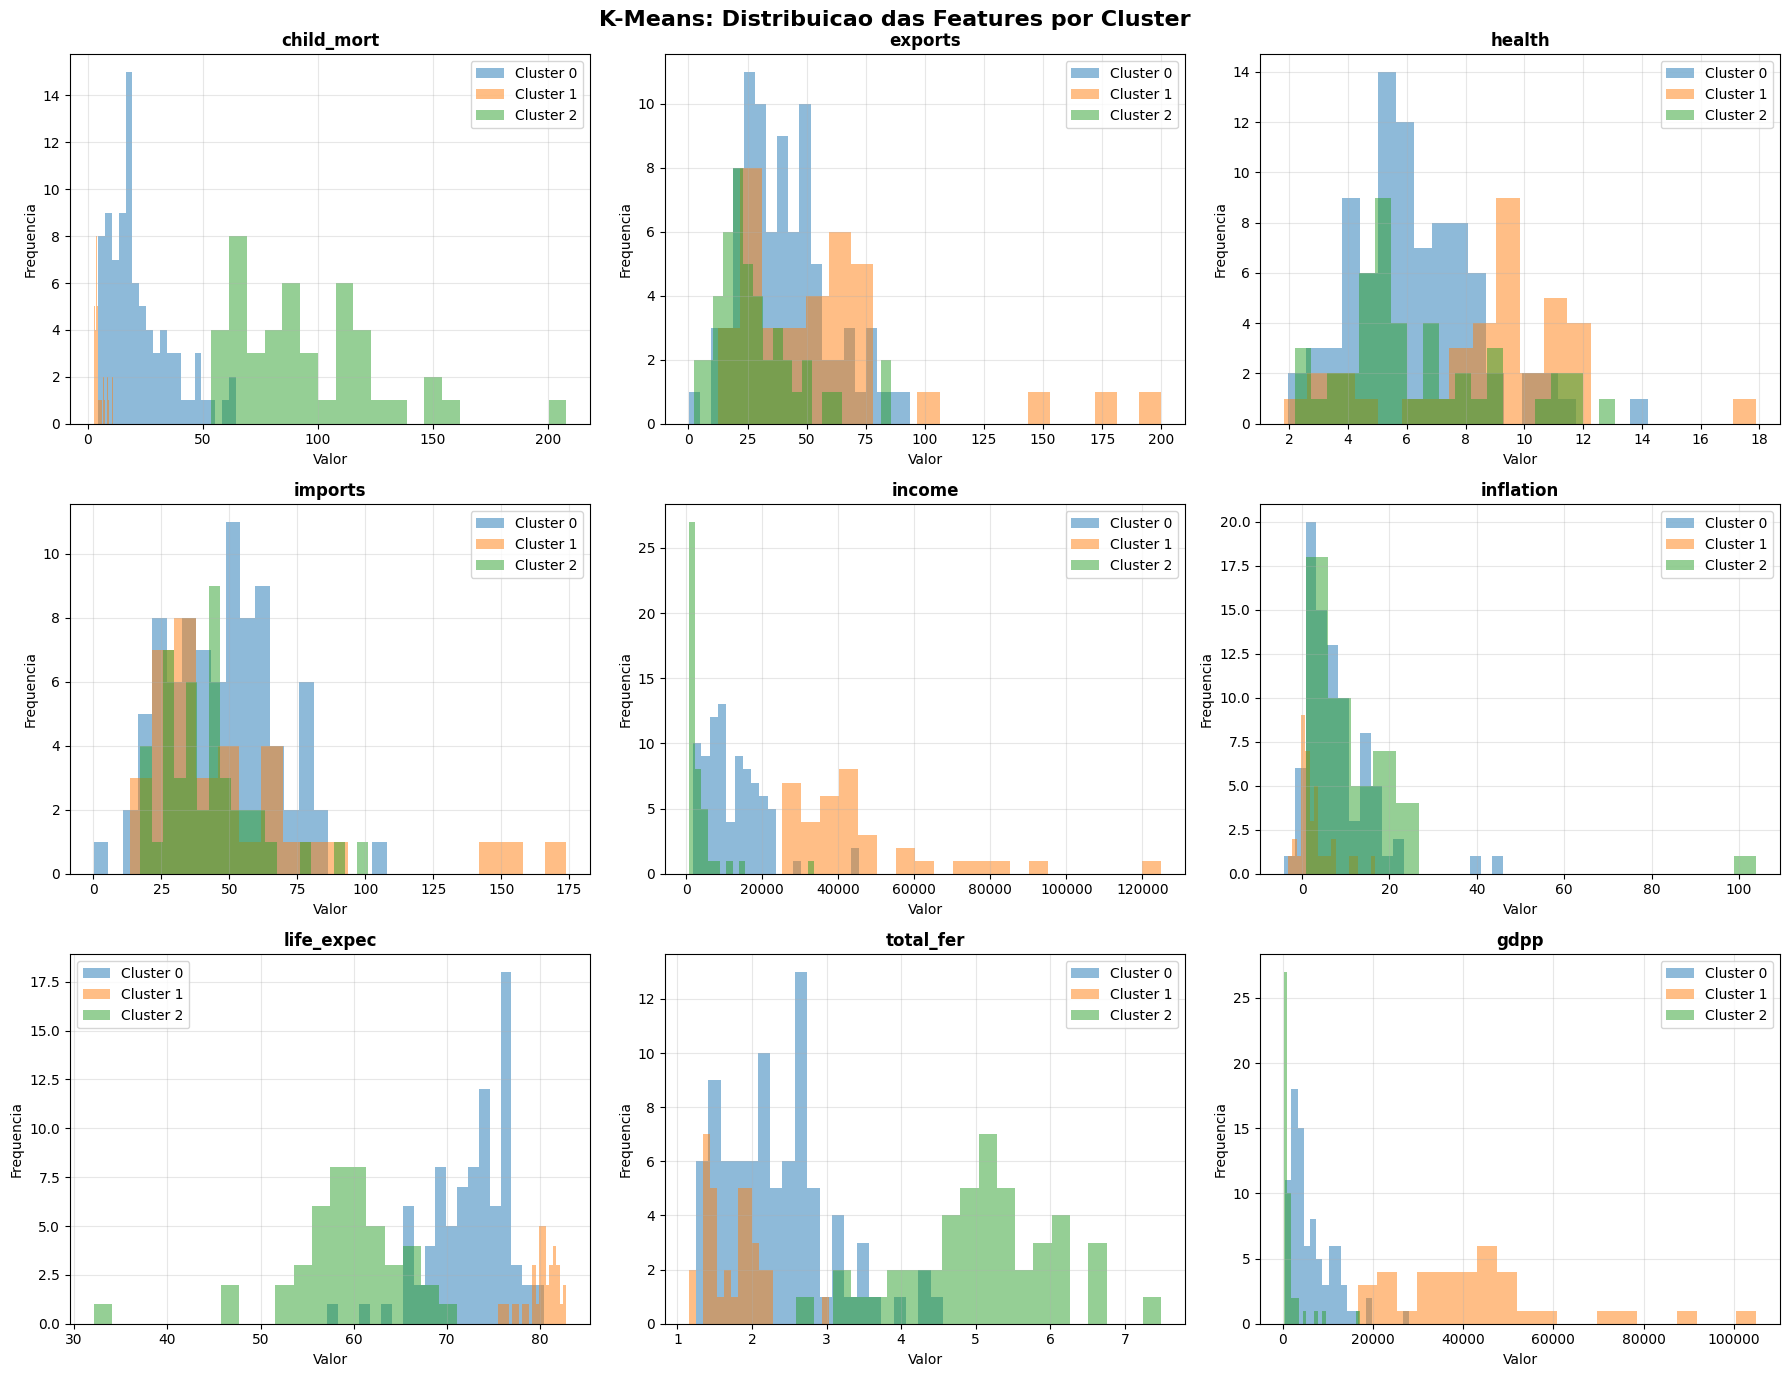

In [41]:
fig1, axes = plt.subplots(3, 3, figsize=(18, 14))
fig1.suptitle('K-Means: Distribuicao das Features por Cluster', fontsize=16, fontweight='bold')

for idx, col in enumerate(num_cols):
    ax = axes[idx // 3, idx % 3]
    
    for cluster_id in range(3):
        cluster_mask = kmeans_labels == cluster_id
        cluster_data = df[cluster_mask][col]
        ax.hist(cluster_data, alpha=0.5, label=f'Cluster {cluster_id}', bins=20)
    
    ax.set_title(f'{col}', fontweight='bold')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frequencia')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()

/var/folders/_z/2mdksj291s782py9yt8kqq1r0000gn/T/ipykernel_7609/3519394945.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=[f'C{i}' for i in range(3)])
/var/folders/_z/2mdksj291s782py9yt8kqq1r0000gn/T/ipykernel_7609/3519394945.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=[f'C{i}' for i in range(3)])
/var/folders/_z/2mdksj291s782py9yt8kqq1r0000gn/T/ipykernel_7609/3519394945.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=[f'C{i}' for i in range(3)])
/var/folders/_z/2mdksj291s782py9yt8kqq1r0000gn

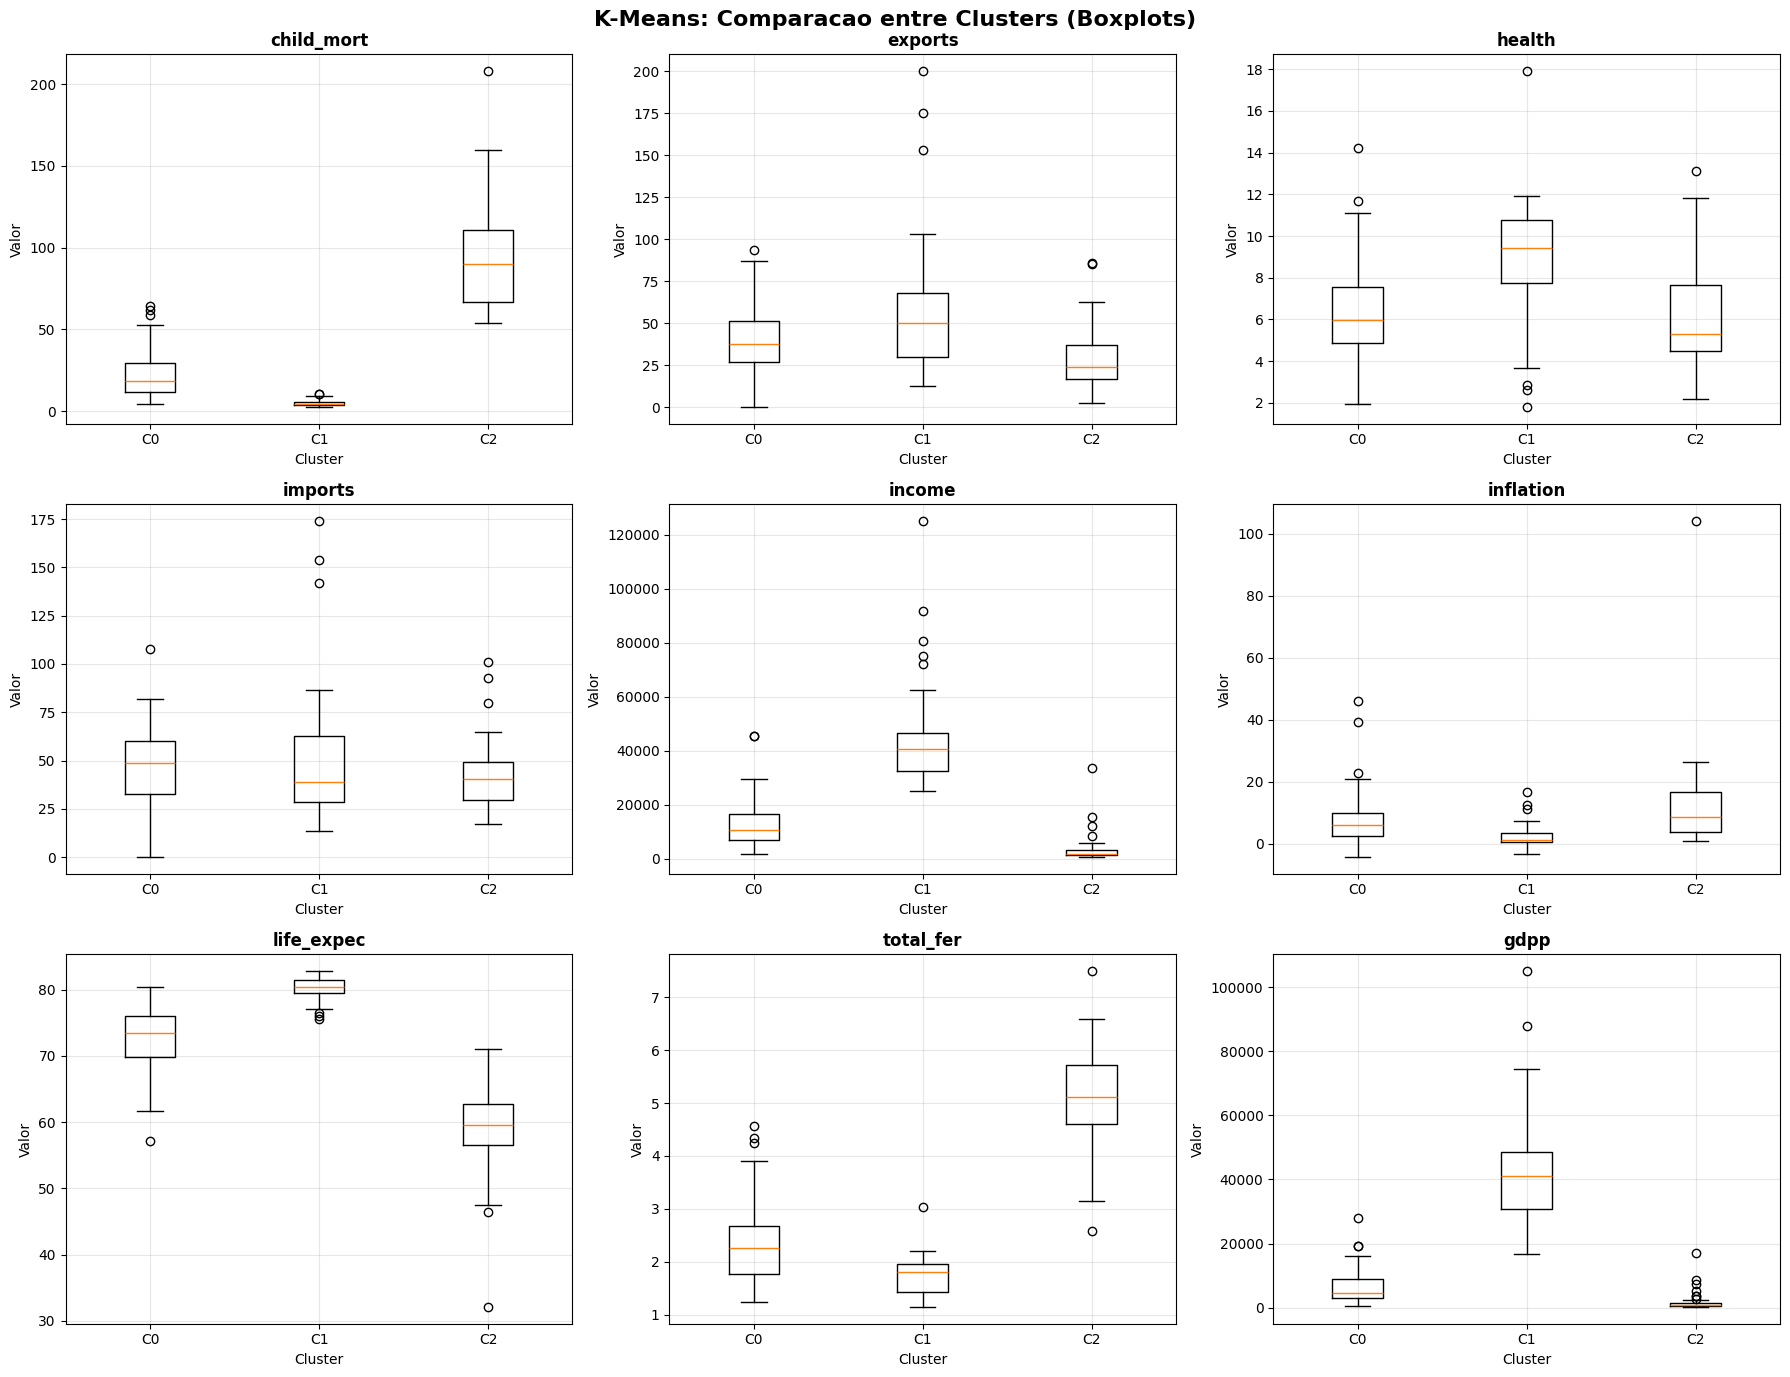

In [42]:
fig2, axes = plt.subplots(3, 3, figsize=(18, 14))
fig2.suptitle('K-Means: Comparacao entre Clusters (Boxplots)', fontsize=16, fontweight='bold')

for idx, col in enumerate(num_cols):
    ax = axes[idx // 3, idx % 3]
    
    data_to_plot = [df[kmeans_labels == i][col].values for i in range(3)]
    bp = ax.boxplot(data_to_plot, labels=[f'C{i}' for i in range(3)])
    
    ax.set_title(f'{col}', fontweight='bold')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Valor')
    ax.grid(True, alpha=0.3)

plt.tight_layout()

##### - Características de cada cluster (pela média)

In [28]:
main_characteristics(cluster_zero_data, "CLUSTER 0")
main_characteristics(cluster_one_data, "CLUSTER 1")
main_characteristics(cluster_two_data, "CLUSTER 2")


CARACTERISTICAS PRINCIPAIS CLUSTER 0:
  - Mortalidade Infantil: 22.5 (por 1000)
  - Expectativa de Vida: 72.6 anos
  - Renda per capita: $12322
  - GDPP: $6462
  - Gastos com Saude: 6.3% do PIB
  - Inflacao: 7.7%
  - Taxa de Fertilidade: 2.34

CARACTERISTICAS PRINCIPAIS CLUSTER 1:
  - Mortalidade Infantil: 5.0 (por 1000)
  - Expectativa de Vida: 80.1 anos
  - Renda per capita: $45672
  - GDPP: $42494
  - Gastos com Saude: 8.8% do PIB
  - Inflacao: 2.7%
  - Taxa de Fertilidade: 1.75

CARACTERISTICAS PRINCIPAIS CLUSTER 2:
  - Mortalidade Infantil: 95.1 (por 1000)
  - Expectativa de Vida: 59.1 anos
  - Renda per capita: $3540
  - GDPP: $1767
  - Gastos com Saude: 6.3% do PIB
  - Inflacao: 12.0%
  - Taxa de Fertilidade: 5.07


#### País representativo de cada cluster

In [29]:
representative_country(cluster_zero_data, 0)
representative_country(cluster_one_data, 1)
representative_country(cluster_two_data, 2)


PAIS REPRESENTANTE DO CLUSTER 0:
--------------------------------------------------------------------------------

Pais Representante: Suriname
Distancia ao centroide: 0.7198

PAIS REPRESENTANTE DO CLUSTER 1:
--------------------------------------------------------------------------------

Pais Representante: Iceland
Distancia ao centroide: 0.7318

PAIS REPRESENTANTE DO CLUSTER 2:
--------------------------------------------------------------------------------

Pais Representante: Guinea
Distancia ao centroide: 0.7704


In [30]:
print(f"\nJUSTIFICATIVA:")
print(f"Os países representantes são os que possuem as características mais próximas da média do grupo, ou seja, suas características (mortalidade, renda, expectativa de vida, etc.) são as mais representativas da média do grupo.")


JUSTIFICATIVA:
Os países representantes são os que possuem as características mais próximas da média do grupo, ou seja, suas características (mortalidade, renda, expectativa de vida, etc.) são as mais representativas da média do grupo.


### 3.3 Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados

In [45]:
single_linkage = hierarchy.linkage(X_scaled, method='single', metric='euclidean')
complete_linkage = hierarchy.linkage(X_scaled, method='complete', metric='euclidean')
average_linkage = hierarchy.linkage(X_scaled, method='average', metric='euclidean')
ward_linkage = hierarchy.linkage(X_scaled, method='ward', metric='euclidean')


In [37]:
def show_dendrogram(linkage, title):
    f, ax = plt.subplots(1, 1, figsize=(24, 12))

    hierarchy.dendrogram(
        linkage,
        labels=df['country'].values,
        distance_sort=True,
        above_threshold_color='red',
        ax=ax,
    )
    ax.set_title(title)

    sns.despine()
    plt.show()

##### Single Linkage

Utilizando o método SINGLE são conectados os pontos mais próximos (menor distância entre qualquer par de elementos entre os dois grupos). Podemos ver na imagem abaixo que acabou por gerar clusters longos e menos definidos. Pode fazer com que países mais isolados se conectem com clusters maiores.

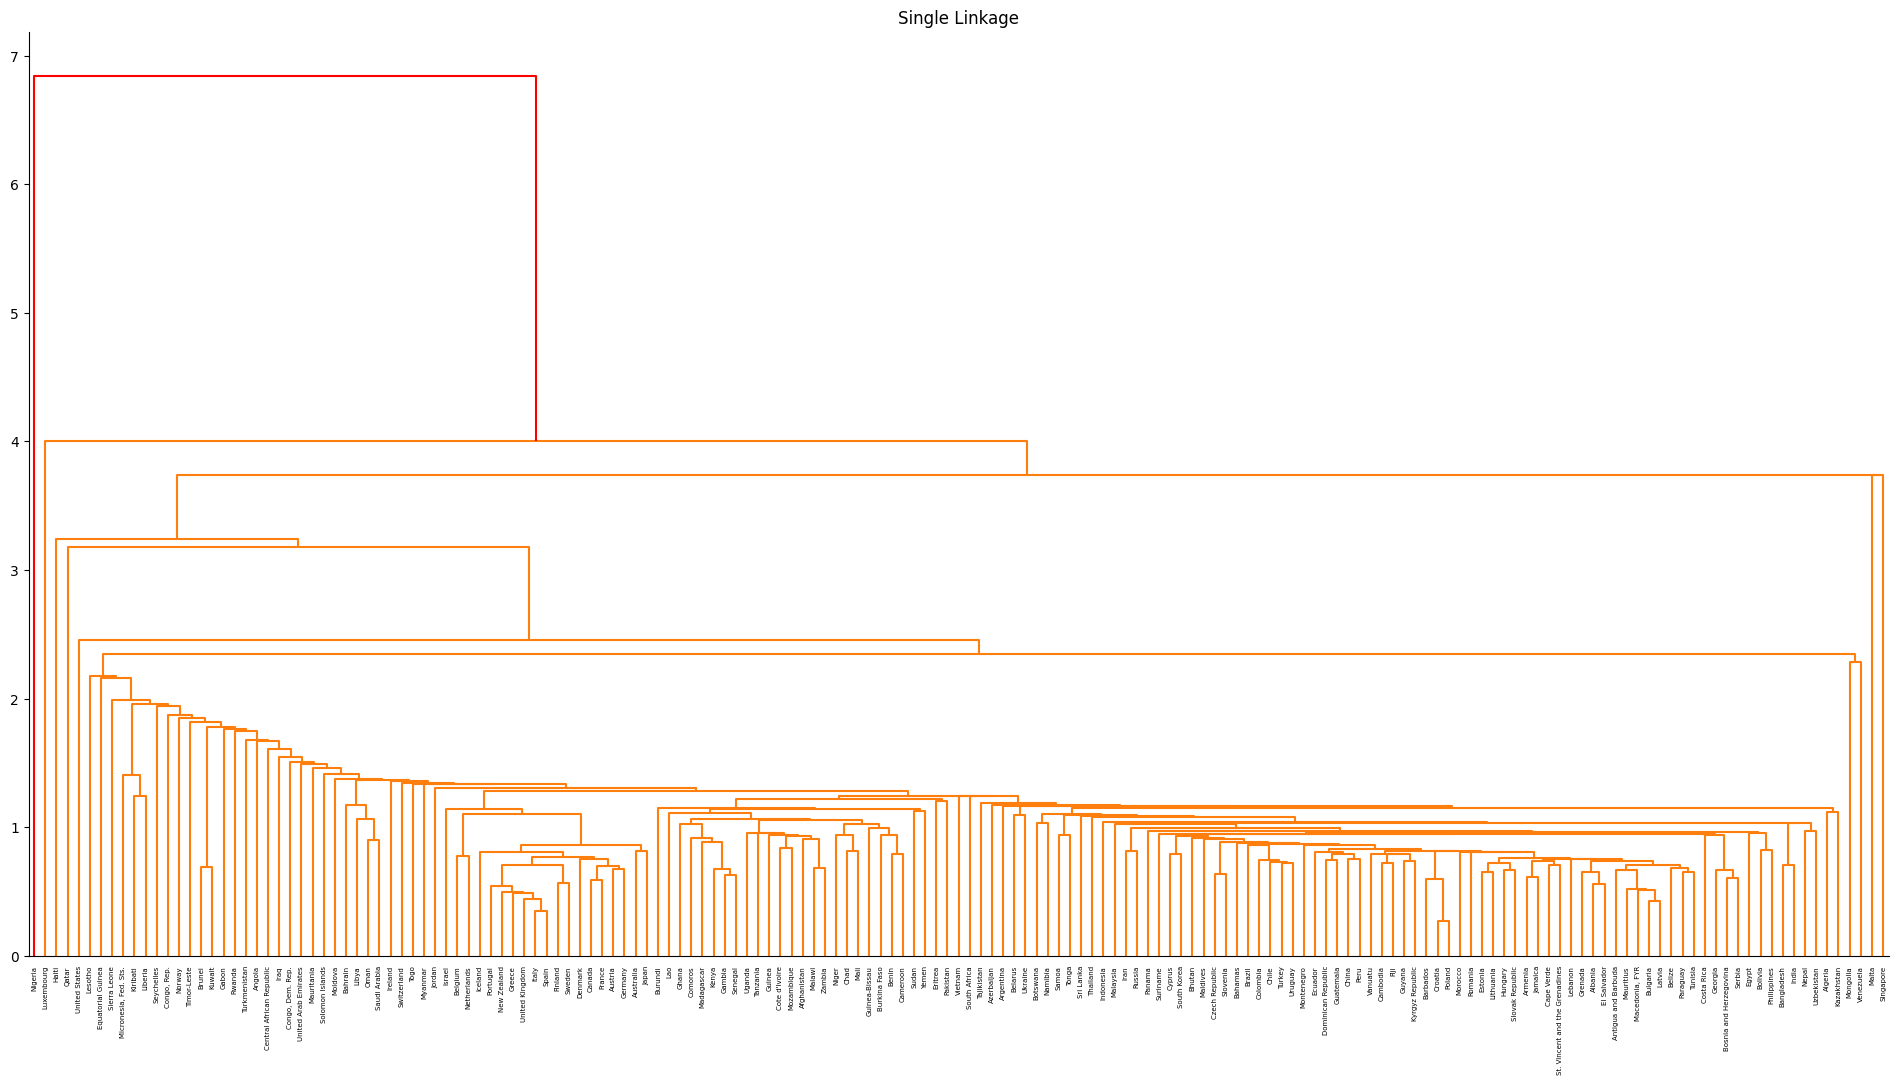

In [43]:
show_dendrogram(single_linkage, 'Single Linkage')

##### Complete Linkage

Utilizando o método COMPLETE são elementos de maior distância. É mais robusto a outliers se comparar com o método SINGLE. Os clusters são mais equilibrados.

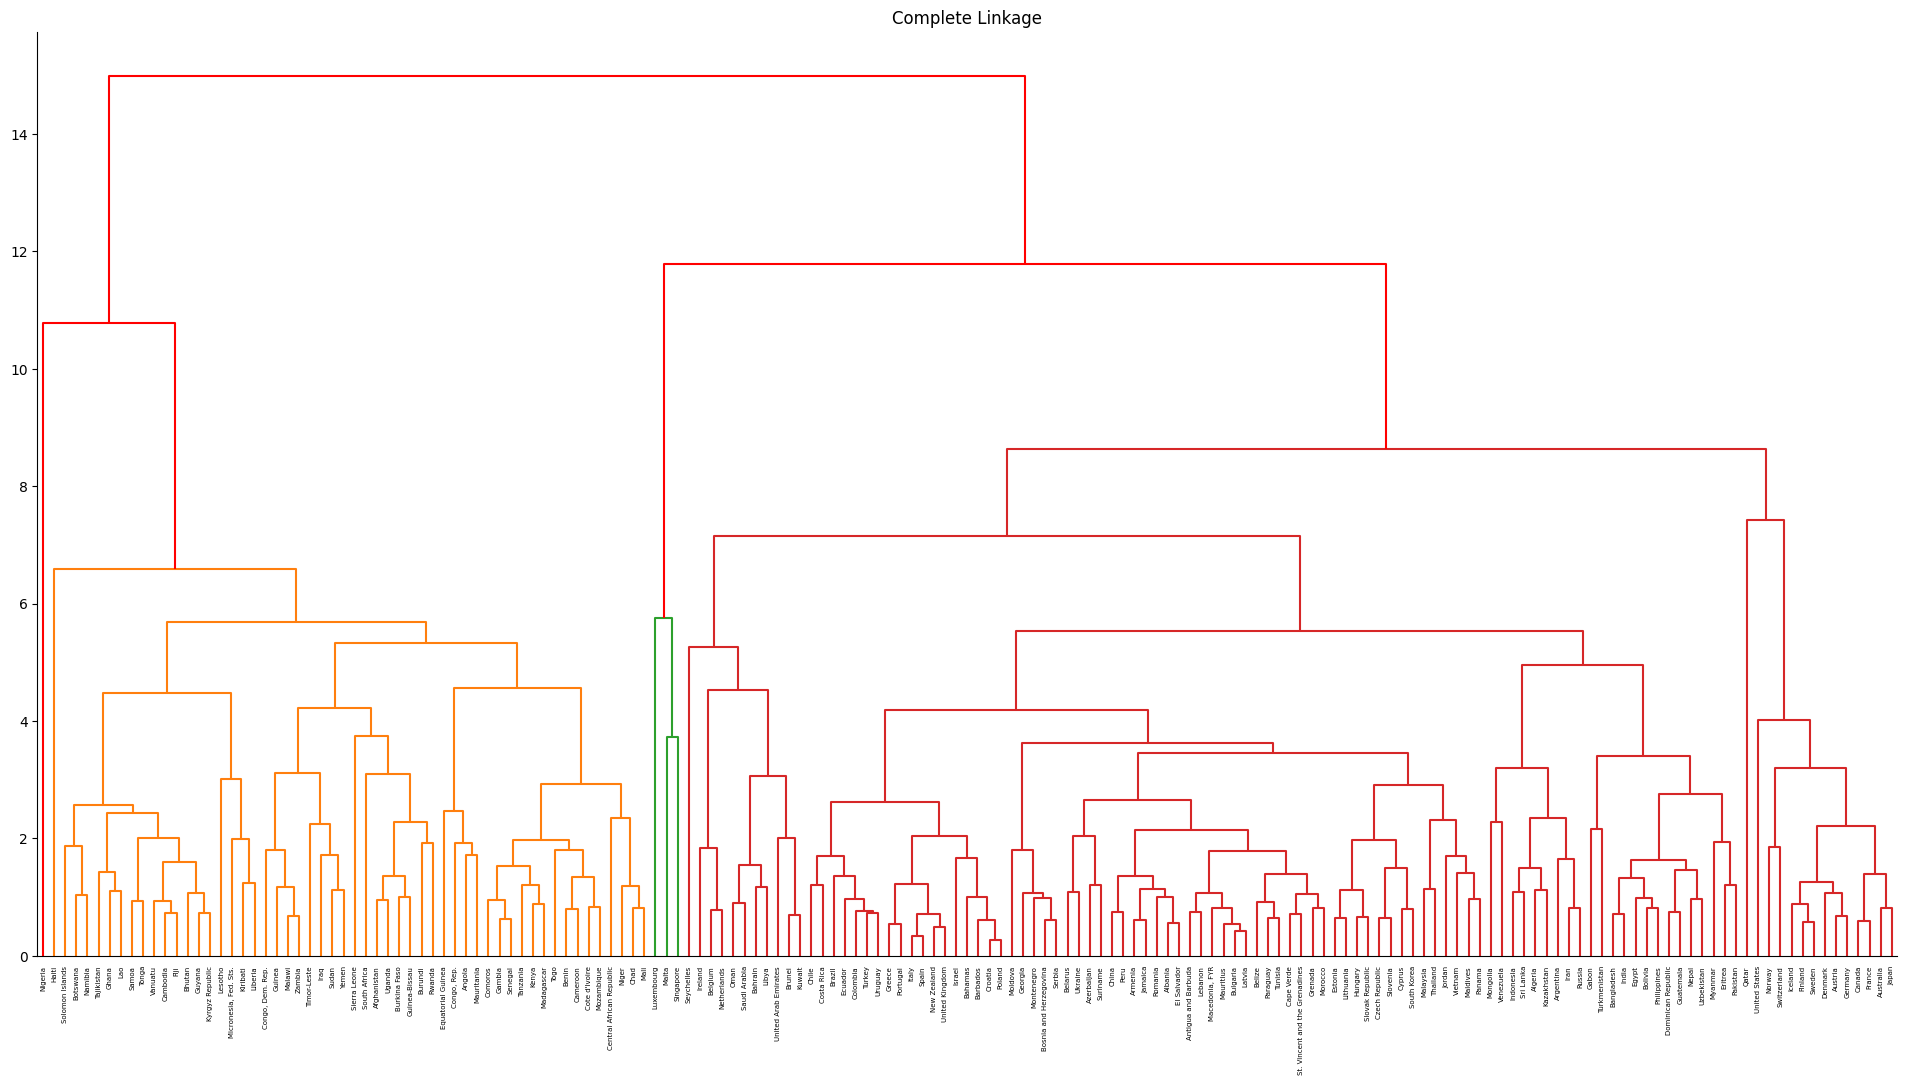

In [44]:

show_dendrogram(complete_linkage, 'Complete Linkage')


##### Average Linkage

Utilizando o método AVERAGE é um meio termo entre o Single e o Complete, usando a média das distâncias entre todos os pontos dos clusters. Os clusters formados são estáveis com distribuição mais homogênea. Trás um equilíbrio entre compactação e separabilidade dos clusters.

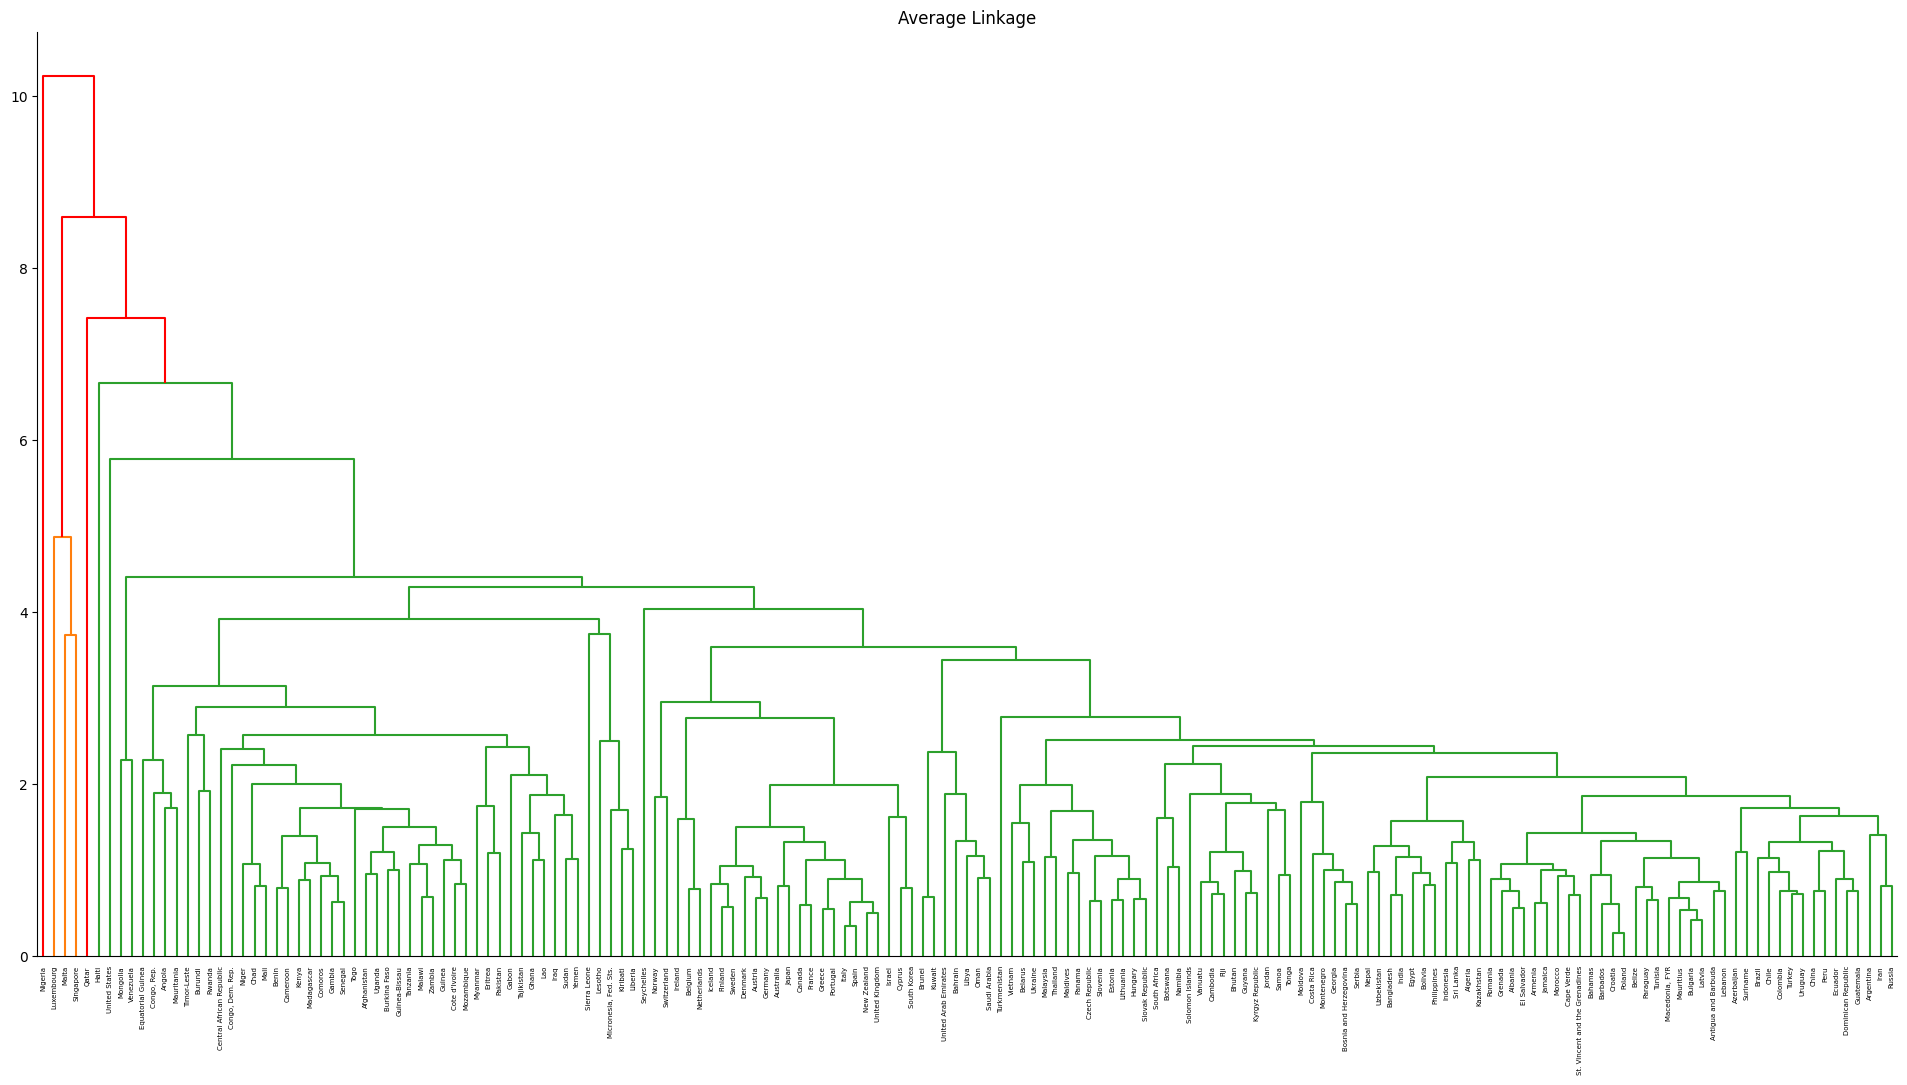

In [46]:
show_dendrogram(average_linkage, 'Average Linkage')

##### Ward Linkage

Utilizando o método WARD minimiza a soma das variâncias dentro dos grupos o que torna os clusters mais visualmente separados e balanceados que os demais métodos anteriores. 

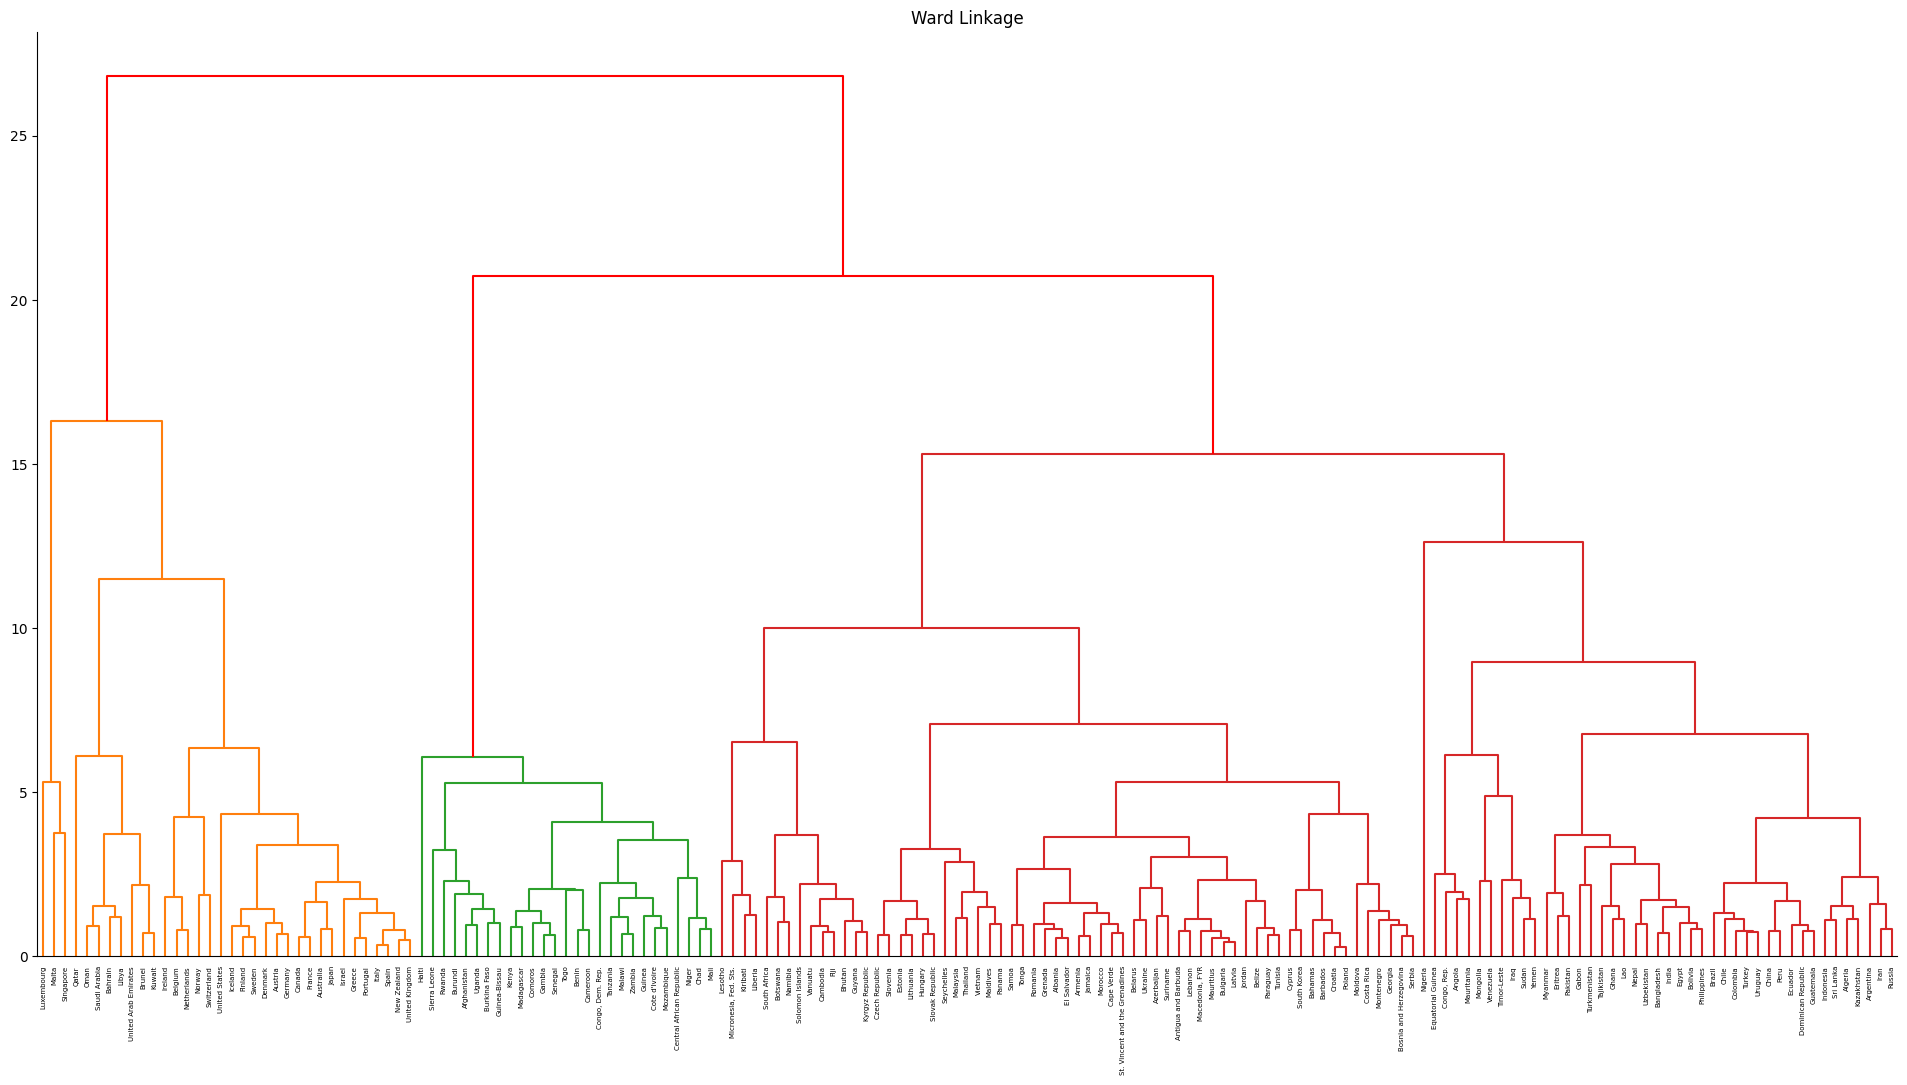

In [47]:
show_dendrogram(ward_linkage, 'Ward Linkage')

Entre os diferentes métodos, parece que o Ward apresentou o melhor equilíbrio entre a separação e estabilidade dos clusters. 

## Parte 4 - Escolha de algoritmos

### 4.1. Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.

1. Definição do número de clusters
    - O algoritmo de K-médias deve ser inicializado com o número de clusters.
2. Definição dos centróides iniciais
	- É selecionado aleatoriamente k pontos iniciais do dataset para serem os centróides.
3. Cálculo da distância de cada ponto para o centróide mais próximo
	- Para cada dado no conjunto é calculado a distância do ponto para cada centróide e atribui o ponto ao cluster cujo centróide é o mais próximo.
4. Recálculo dos centróides
	- Após todos os pontos serem atribuídos os centróides são recalculados (um novo centróide é a média dos pontos dentro de cada cluster)
5. Verificação de convergência
	- Se os centróides não mudarem significativamente em relação à iteração anterior (ou atingir número máximo de iterações), parar.
	- Caso contrário, voltar ao passo 3.

### 4.2. O algoritmo de K-médias é sensível a outliers nos dados. Explique.

O K-means usa média aritmética para recalcular cada centróide. Os outliers são valores muito extremos. Com isso, os outliers acabam puxando a média fazendo com que os centróides se desloquem para regiões onde não existe uma densidade real dos dados, fazendo com que o cluster seja definido incorretamente e os pontos normais sejam classificados de forma errada.

Por exemplo, supondo que temos os seguintes valores: 10, 12, 11 e 500. A média desses valores é 133,25. Isso porque o valor 500 acaba puxando muito o centróide pra longe do grupo real.

### 4.4 Por quê o algoritmo de DBScan é mais robusto à presença de outliers?

Diferentemente do K-médias, o DBSCAN não tenta encontrar centróides nem calcula médias. Basicamente, ele forma clusters com base na densidade dos pontos. Pontos em regiões densas são definidos como pertencentes a um cluster, enquanto que pontos isolados (baixa densidade) são definidos como outliers (ruído).

Isso faz com que os outliers sejam ignorados naturalmente pelo algoritmos e não influenciem a formação dos clusters. Como ele não tenta encontrar centróides, os outliers acabam não distorcendo o cálculo, ele simplesmente classifica como ruído sem tentar "forçar" um ponto extremo dentro de um cluster.